In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
# Import PCA from sklearn
from sklearn.decomposition import PCA

from datetime import datetime
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
normal_data=pd.read_csv("../input/insdn-dataset/Normal_data.csv")
metasploti_data=pd.read_csv("../input/insdn-dataset/OVS.csv")
ovs_data=pd.read_csv("../input/insdn-dataset/metasploitable-2.csv")

In [4]:
frames=[normal_data,metasploti_data,ovs_data]
data=pd.concat(frames,ignore_index=True)
data = shuffle(data)

In [5]:
data.Label = data.Label.str.replace(' ', '')
print(data.Label.unique())

['Normal' 'Probe' 'DDoS' 'DoS' 'BFA' 'BOTNET' 'Web-Attack' 'U2R']


In [6]:
data=data.loc[:, (data != 0).any(axis=0)]

In [7]:
data = data.loc[:, data.columns.difference(['Flow ID', 'Src IP','Dst IP','Timestamp','Src Port','Dst Port','Protocol'])]
data=data.sample(frac=1, replace=True, random_state=3).reset_index(drop=True)
data.head()

,ACK Flag Cnt,Active Max,Active Mean,Active Min,Active Std,Bwd Header Len,Bwd IAT Max,Bwd IAT Mean,Bwd IAT Min,Bwd IAT Std,...,SYN Flag Cnt,Subflow Bwd Byts,Subflow Bwd Pkts,Subflow Fwd Byts,Subflow Fwd Pkts,Tot Bwd Pkts,Tot Fwd Pkts,TotLen Bwd Pkts,TotLen Fwd Pkts,URG Flag Cnt
0,0,0.0,0.0,0.0,0.0,144,18027.0,9.881333e+03,7.0,9.133527e+03,...,1,30,4,30,4,4,4,30.0,30.0,0
1,0,0.0,0.0,0.0,0.0,0,18.0,1.800000e+01,18.0,0.000000e+00,...,0,0,2,0,0,2,0,0.0,0.0,0
2,1,1851.0,1851.0,1851.0,0.0,232,64000000.0,1.070000e+07,769.0,2.610000e+07,...,0,30,7,30,3,7,3,30.0,30.0,0
3,0,0.0,0.0,0.0,0.0,0,1.0,1.000000e+00,1.0,0.000000e+00,...,0,0,2,0,0,2,0,0.0,0.0,0
4,0,0.0,0.0,0.0,0.0,0,2.0,2.000000e+00,2.0,0.000000e+00,...,0,0,2,0,0,2,0,0.0,0.0,0


In [8]:
data.Label.replace(['U2R','BFA','DDoS','DoS','Probe','Web-Attack','BOTNET'],'Saldiri',inplace=True)
data.Label.replace("Saldiri","1",inplace=True)
data.Label.replace("Normal","0",inplace=True)
data.Label.unique()

array(['1', '0'], dtype=object)

In [9]:
df_label=data.Label
#df_label=pd.get_dummies(df_label)
df_label

0         1
1         1
2         1
3         1
4         1
         ..
343884    1
343885    0
343886    1
343887    1
343888    1
Name: Label, Length: 343889, dtype: object

In [10]:
X=data.loc[:, data.columns.difference(['Label'])]
#X=X.sample(frac=1, replace=True, random_state=3).reset_index(drop=True)
X.describe()

,ACK Flag Cnt,Active Max,Active Mean,Active Min,Active Std,Bwd Header Len,Bwd IAT Max,Bwd IAT Mean,Bwd IAT Min,Bwd IAT Std,...,SYN Flag Cnt,Subflow Bwd Byts,Subflow Bwd Pkts,Subflow Fwd Byts,Subflow Fwd Pkts,Tot Bwd Pkts,Tot Fwd Pkts,TotLen Bwd Pkts,TotLen Fwd Pkts,URG Flag Cnt
count,343889.000000,3.438890e+05,3.438890e+05,3.438890e+05,3.438890e+05,343889.000000,3.438890e+05,3.438890e+05,3.438890e+05,3.438890e+05,...,343889.000000,3.438890e+05,343889.000000,3.438890e+05,343889.000000,343889.000000,343889.000000,3.438890e+05,3.438890e+05,343889.000000
mean,0.273417,1.085191e+05,6.437992e+04,4.299838e+04,3.033611e+04,121.294034,4.834333e+06,8.868030e+05,2.049657e+04,1.942193e+06,...,0.237484,7.781649e+03,5.922213,6.272513e+02,6.034584,5.922213,6.034584,7.779608e+03,6.271260e+02,0.011876
std,0.445714,1.215728e+06,8.274893e+05,7.339170e+05,4.625201e+05,1849.421552,1.632613e+07,3.301350e+06,1.036850e+06,6.844831e+06,...,0.425542,2.886370e+05,91.044388,4.487390e+04,1553.893508,91.044388,1553.893508,2.881205e+05,4.483190e+04,0.108328
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.530000e+02,-1.530000e+02,-6.340000e+02,0.000000e+00,...,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.100000e+01,1.100000e+01,3.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,2.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,32.000000,1.639000e+03,8.310000e+02,1.800000e+01,0.000000e+00,...,0.000000,0.000000e+00,2.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
75%,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,92.000000,8.417000e+03,4.711000e+03,4.820000e+02,2.820101e+03,...,0.000000,3.000000e+01,4.000000,3.000000e+01,2.000000,4.000000,2.000000,3.000000e+01,3.000000e+01,0.000000
max,1.000000,1.040000e+08,1.040000e+08,1.040000e+08,6.680000e+07,681904.000000,1.200000e+08,8.260000e+07,8.260000e+07,5.980000e+07,...,1.000000,1.074420e+08,34094.000000,1.504312e+07,910748.000000,34094.000000,910748.000000,1.070000e+08,1.500000e+07,1.000000


In [11]:
column_name=X.columns
sorted(column_name)

['ACK Flag Cnt',
 'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Bwd Header Len',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Tot',
 'Bwd PSH Flags',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Std',
 'Bwd Pkts/s',
 'Bwd Seg Size Avg',
 'Bwd URG Flags',
 'Down/Up Ratio',
 'FIN Flag Cnt',
 'Flow Byts/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow Pkts/s',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Tot',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Std',
 'Fwd Pkts/s',
 'Fwd Seg Size Avg',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Init Bwd Win Byts',
 'Init Fwd Win Byts',
 'PSH Flag Cnt',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Min',
 'Pkt Len Std',
 'Pkt Len Var',
 'Pkt Size Avg',
 'RST Flag Cnt',
 'SYN Flag Cnt',
 'Subflow Bwd Byts',
 'Subflow

In [12]:
X.dtypes

ACK Flag Cnt         int64
Active Max         float64
Active Mean        float64
Active Min         float64
Active Std         float64
                    ...   
Tot Bwd Pkts         int64
Tot Fwd Pkts         int64
TotLen Bwd Pkts    float64
TotLen Fwd Pkts    float64
URG Flag Cnt         int64
Length: 65, dtype: object

In [13]:
# Instantiate PCA
pca = PCA(n_components=10)

# Fit PCA to features
principalComponents = pca.fit_transform(X)

In [14]:
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [8.24347617e-01 1.33189735e-01 1.64897475e-02 1.26016998e-02
 4.57197549e-03 2.86204663e-03 1.56420461e-03 1.06550314e-03
 7.73710818e-04 7.27924755e-04]

 Total Variance Explained: 99.82


Text(0, 0.5, 'cumulative explained variance')

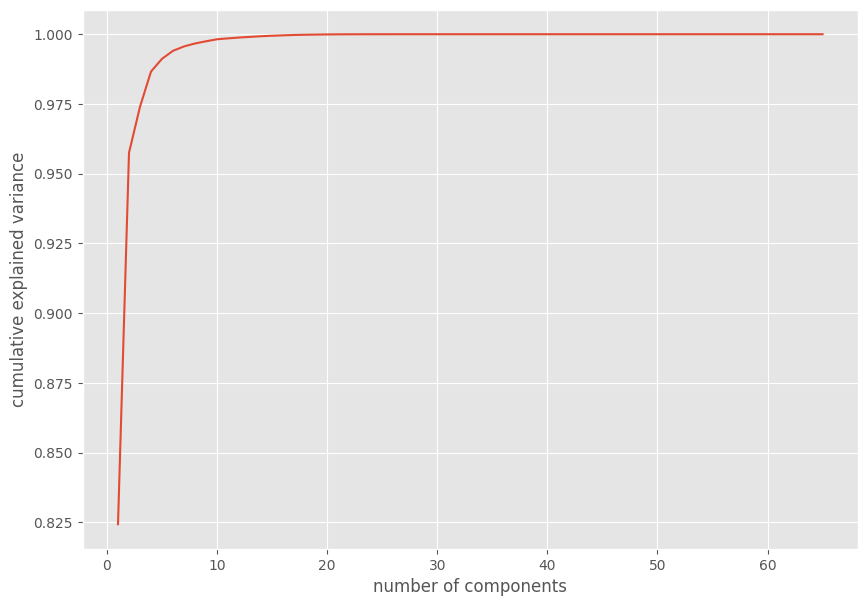

In [15]:
pca = PCA().fit(X)
plt.figure(figsize=(10, 7))
plt.style.use('ggplot')
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

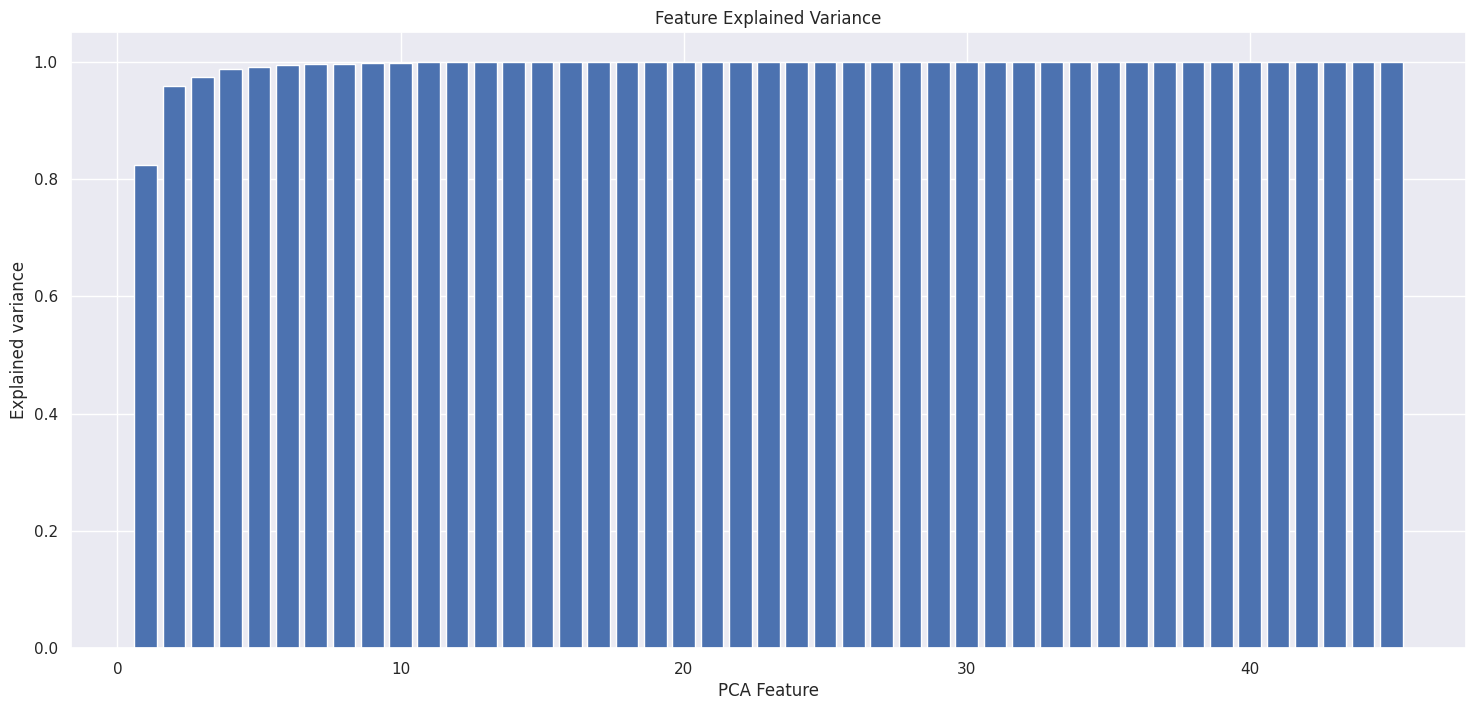

In [16]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA
sns.set()

plt.figure(figsize=(18, 8))
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=45).fit(X)
# Fit and transform data
#pca.fit_transform(X)
 
# Bar plot of explained_variance
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),np.cumsum(pca.explained_variance_ratio_))
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')

plt.show()

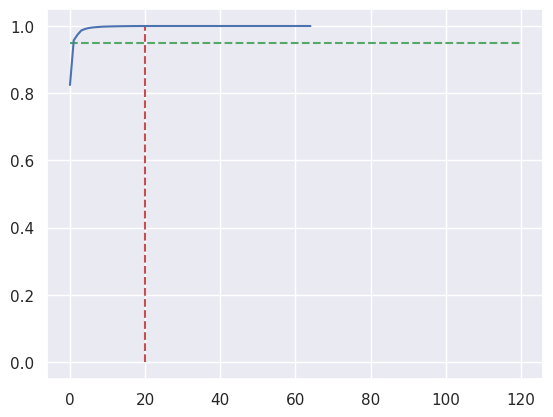

In [17]:
# Decide the number of PCA components based on the retained information
pca = PCA(random_state=20)
pca.fit(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.vlines(x=20, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(explained_variance)


pca_final = PCA(n_components=13)
df_train_pca = pca_final.fit_transform(X)
 
# Note that the above can be automated like this: (without using plot)
pca_again = PCA(0.95)
df_train_pca = pca_again.fit_transform(X)
 
# Check the correlations between components
corr_mat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[15,8])
sns.heatmap(corr_mat)
plt.show()

In [18]:
componenets=30
pca = PCA(componenets)
X_pca_components=pca.fit_transform(X)
X_pca_df=pd.DataFrame(data=X_pca_components)
X_pca_components

array([[-1.46743548e+07, -2.67265088e+05,  1.39210562e+05, ...,
        -3.97845704e+01, -1.63300023e+03,  4.43826129e+03],
       [-1.47300452e+07, -3.09883197e+05,  1.26394857e+05, ...,
        -1.00878729e+02, -2.30254536e+03,  4.19080146e+03],
       [ 1.53091790e+08, -4.23168491e+07, -6.03186506e+06, ...,
         3.38142152e+02, -9.30382375e+00, -3.00202619e+02],
       ...,
       [-1.46954857e+07, -3.00344377e+05,  8.39937398e+04, ...,
        -7.73298311e+01, -1.80646949e+03,  4.44610923e+03],
       [-1.47271375e+07, -3.09728369e+05,  1.25461036e+05, ...,
        -1.05032111e+02, -1.76104515e+03,  4.52096553e+03],
       [-1.47054863e+07, -3.08808916e+05,  1.18853121e+05, ...,
        -9.00800205e+01, -1.75348479e+03,  4.52877090e+03]])

In [19]:
sum(pca.explained_variance_ratio_)

0.9999999944963675

n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = column_name

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
pca_features = pd.DataFrame(sorted(dic.items()))
sorted(pca_features[1])

principalDf = pd.DataFrame(data = X_pca_components
             , columns = pca_features[1])
principalDf

df=pd.DataFrame(data=X_pca[0:,0:],
            index=[i for i in range(X_pca.shape[0])],
            columns=pca_features)
#df= df.astype(str)
df=df.apply(lambda x:round(x,2))
df

In [20]:
from sklearn.preprocessing import MinMaxScaler
# Standardize the features
X = MinMaxScaler().fit_transform(X_pca_df)

# Preview X
pd.DataFrame(data=X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000212,0.342435,0.434165,0.010290,0.302588,0.319652,0.384415,0.183554,0.296148,0.242243,...,0.428885,0.461518,0.451970,0.290460,0.449421,0.077978,0.151809,0.385556,0.084681,0.404709
1,0.000053,0.342250,0.434111,0.010289,0.302621,0.319617,0.384203,0.183560,0.296182,0.242231,...,0.428873,0.461497,0.451962,0.290469,0.449395,0.077978,0.151808,0.385548,0.084178,0.403693
2,0.478174,0.159988,0.408444,0.009947,0.308123,0.327185,0.370819,0.182198,0.294921,0.241779,...,0.429059,0.462202,0.452291,0.290323,0.450992,0.077441,0.153087,0.385601,0.085900,0.385262
3,0.000036,0.342246,0.434123,0.010284,0.302593,0.319501,0.384106,0.183541,0.296176,0.242122,...,0.428480,0.461722,0.452052,0.290441,0.448858,0.077947,0.151930,0.385560,0.077184,0.380880
4,0.000045,0.342248,0.434117,0.010287,0.302608,0.319562,0.384158,0.183551,0.296179,0.242180,...,0.428688,0.461603,0.452005,0.290456,0.449142,0.077963,0.151866,0.385554,0.080887,0.392957


In [21]:
df_label.unique()

array(['1', '0'], dtype=object)

In [22]:
df_label= pd.get_dummies(df_label, drop_first=True)
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X,df_label, test_size=0.25, random_state=15)
X_test

array([[6.62646942e-01, 7.52457585e-01, 5.32424526e-01, ...,
        3.79784315e-01, 8.57407252e-02, 4.33486534e-01],
       [8.46983607e-05, 3.42273630e-01, 4.34123123e-01, ...,
        3.85549286e-01, 8.49235930e-02, 4.05208432e-01],
       [1.31190298e-04, 3.42336371e-01, 4.34129700e-01, ...,
        3.85547488e-01, 8.47595061e-02, 4.05008309e-01],
       ...,
       [2.97945241e-02, 3.49834775e-01, 4.61829360e-01, ...,
        3.85883040e-01, 8.64950379e-02, 1.65836123e-01],
       [7.17364195e-05, 3.42266953e-01, 4.34116928e-01, ...,
        3.85549125e-01, 8.52832613e-02, 4.04342235e-01],
       [1.38777098e-03, 3.43373475e-01, 4.34609513e-01, ...,
        3.85559773e-01, 8.45970469e-02, 4.08813335e-01]])

In [23]:
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8955369709094716

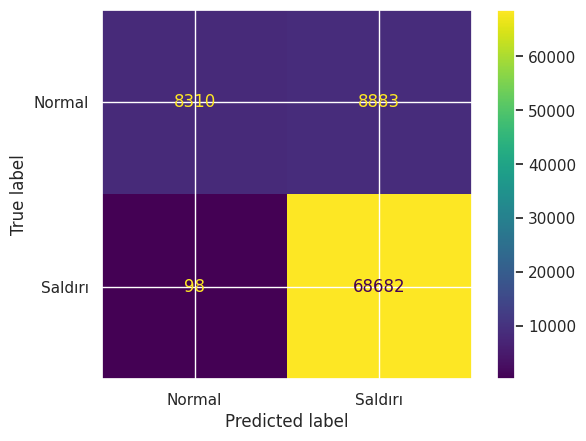

In [24]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Normal","Saldırı"])
disp.plot()

In [25]:
y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.99      0.48      0.65     17193
        True       0.89      1.00      0.94     68780

    accuracy                           0.90     85973
   macro avg       0.94      0.74      0.79     85973
weighted avg       0.91      0.90      0.88     85973



In [26]:
y_pred = model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, y_pred)
auc_lr = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('ROC AUC: %f' % auc_lr)

ROC AUC: 0.967600


In [27]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100,learning_rate=0.5,n_jobs=4)
model.fit(X_train, y_train, 
             early_stopping_rounds=500, 
             eval_set=[(X_test, y_test)],
             verbose=False)
pred=model.predict(X_test)
print("----- XGBoost ------")
print(model.score(X_test,y_test))

print("----- XGBoost ------")

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


----- XGBoost ------
0.9996743163551347
----- XGBoost ------


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     17193
        True       1.00      1.00      1.00     68780

    accuracy                           1.00     85973
   macro avg       1.00      1.00      1.00     85973
weighted avg       1.00      1.00      1.00     85973

ROC AUC: 1.000000


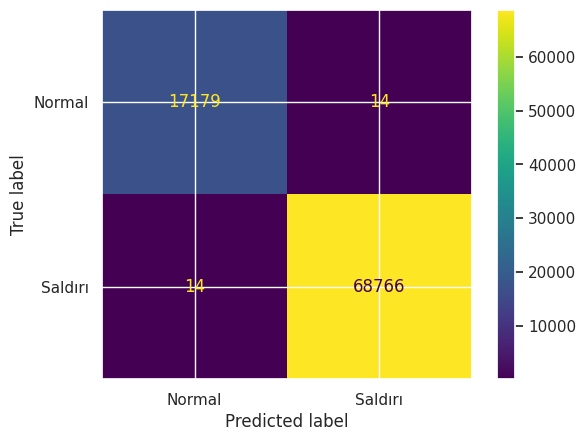

In [28]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Normal","Saldırı"])
disp.plot()


y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))


y_pred = model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test, y_pred)
auc_xgb = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('ROC AUC: %f' % auc_xgb)

In [29]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100, max_depth=10,random_state=1)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- Random Forest ------")
print(model.score(X_test,y_test))
print("----- Random Forest ------")

/tmp/ipykernel_26/3727710151.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


----- Random Forest ------
0.9987088969792842
----- Random Forest ------


In [30]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

       False       1.00      0.99      1.00     17193
        True       1.00      1.00      1.00     68780

    accuracy                           1.00     85973
   macro avg       1.00      1.00      1.00     85973
weighted avg       1.00      1.00      1.00     85973



              precision    recall  f1-score   support

       False       1.00      0.99      1.00     17193
        True       1.00      1.00      1.00     68780

    accuracy                           1.00     85973
   macro avg       1.00      1.00      1.00     85973
weighted avg       1.00      1.00      1.00     85973

ROC AUC: 0.999900


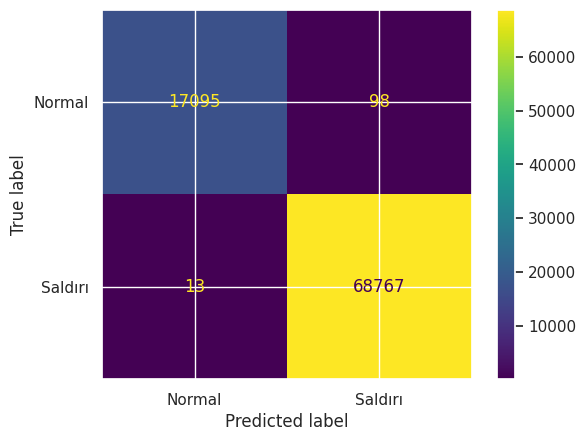

In [31]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Normal","Saldırı"])
disp.plot()


y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))


y_pred = model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_pred)
auc_rf = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('ROC AUC: %f' % auc_rf)

In [32]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(splitter="best",criterion="entropy",random_state=0)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- KNN ------")
print(model.score(X_test,y_test))
print("----- KNN ------")

----- KNN ------
0.999569632326428
----- KNN ------


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     17193
        True       1.00      1.00      1.00     68780

    accuracy                           1.00     85973
   macro avg       1.00      1.00      1.00     85973
weighted avg       1.00      1.00      1.00     85973

ROC AUC: 0.999200


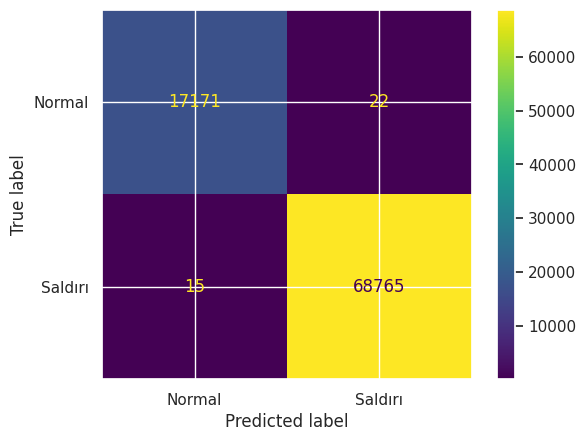

In [33]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Normal","Saldırı"])
disp.plot()


y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))


y_pred = model.predict_proba(X_test)[:, 1]
fpr_dc, tpr_dc, _ = metrics.roc_curve(y_test, y_pred)
auc_dc = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('ROC AUC: %f' % auc_dc)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3,weights='uniform')
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- DecisionTreeRegressor ------")
print(model.score(X_test,y_test))
print("----- DecisionTreeRegressor ------")

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


----- DecisionTreeRegressor ------
0.9994882114152117
----- DecisionTreeRegressor ------


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     17193
        True       1.00      1.00      1.00     68780

    accuracy                           1.00     85973
   macro avg       1.00      1.00      1.00     85973
weighted avg       1.00      1.00      1.00     85973

ROC AUC: 0.999700


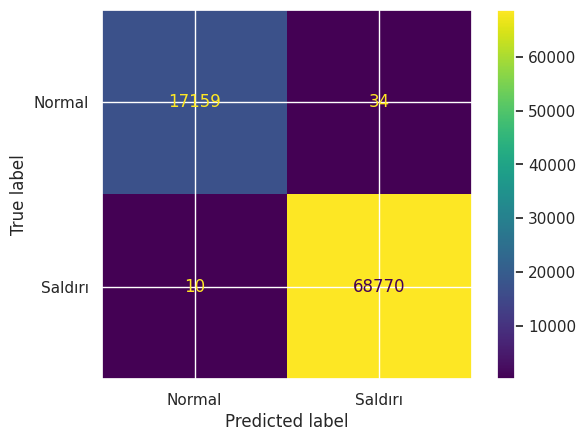

In [35]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Normal","Saldırı"])
disp.plot()


y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))


y_pred = model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, y_pred)
auc_knn = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('ROC AUC: %f' % auc_knn)

In [36]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- AdaBoostClassifier ------")
print(model.score(X_test,y_test))
print("----- AdaBoostClassifier ------")

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


----- AdaBoostClassifier ------
0.9719097856303723
----- AdaBoostClassifier ------


              precision    recall  f1-score   support

       False       0.91      0.95      0.93     17193
        True       0.99      0.98      0.98     68780

    accuracy                           0.97     85973
   macro avg       0.95      0.97      0.96     85973
weighted avg       0.97      0.97      0.97     85973

ROC AUC: 0.995900


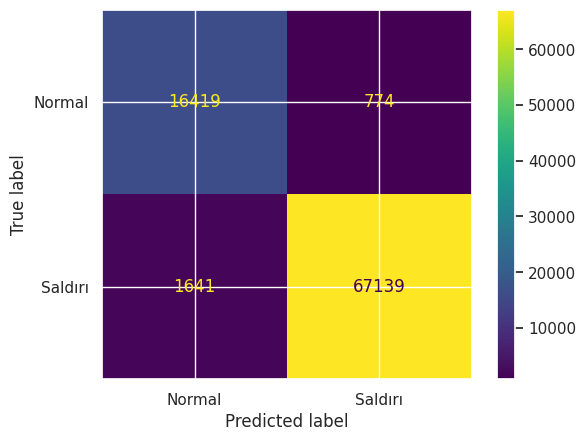

In [37]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Normal","Saldırı"])
disp.plot()


y_pred = model.predict(X_test)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))


y_pred = model.predict_proba(X_test)[:, 1]
fpr_adaboost, tpr_adaboost, _ = metrics.roc_curve(y_test, y_pred)
auc_adaboost = round(metrics.roc_auc_score(y_test, y_pred), 4)
print('ROC AUC: %f' % auc_adaboost)

from sklearn.svm import SVC
model = SVC(C=1.0, random_state=1, kernel='linear')
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("----- SVC ------")
print(model.score(X_test,y_test))
print("----- SVC ------")

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,Flatten
from keras.layers import  Embedding, SimpleRNN, LSTM,Masking,Bidirectional
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.models import model_from_json,model_from_yaml,load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence,text
from sklearn.preprocessing import LabelEncoder
from keras import metrics, regularizers
from keras.optimizers import RMSprop,Adam
from keras import backend as K
import sklearn.metrics as metrics

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(257916, 30)
(85973, 30)
(257916, 1)
(85973, 1)


In [40]:
# Model için gerekli değerler
#epochs_sayisi=5
batch_size=512
# Çıktı gözükmemesi için
verbose=1
validation_split=0.1
max_len=componenets
vocab_size=10000
epoch_sayisi=5

Epoch 1/5
454/454 [==============================] - 59s 115ms/step - loss: 0.7664 - acc: 0.7893 - val_loss: 0.5096 - val_acc: 0.8028
Epoch 2/5
454/454 [==============================] - 52s 114ms/step - loss: 0.5081 - acc: 0.8005 - val_loss: 0.5046 - val_acc: 0.8028
Epoch 3/5
454/454 [==============================] - 52s 114ms/step - loss: 0.5026 - acc: 0.8005 - val_loss: 0.4983 - val_acc: 0.8028
Epoch 4/5
454/454 [==============================] - 51s 113ms/step - loss: 0.5018 - acc: 0.8005 - val_loss: 0.4975 - val_acc: 0.8028
Epoch 5/5
454/454 [==============================] - 51s 113ms/step - loss: 0.5012 - acc: 0.8005 - val_loss: 0.4970 - val_acc: 0.8028
Model evaluate
Test loss: 0.5007779598236084
Test accuracy: 0.8000186085700989
Model evaluate


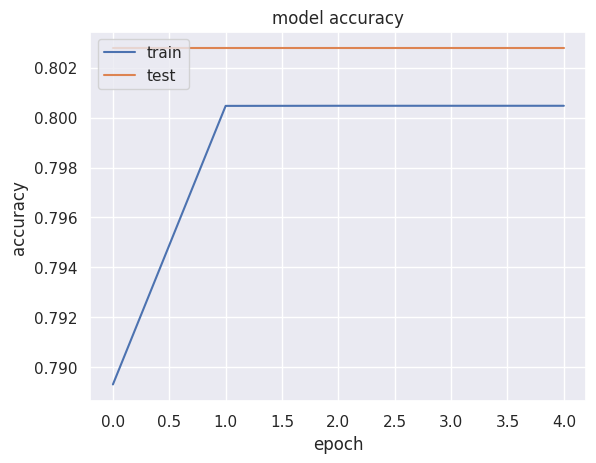

-----------------Classification Report -----------------------
2687/2687 [==============================] - 31s 11ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00     17193
        True       0.80      1.00      0.89     68780

    accuracy                           0.80     85973
   macro avg       0.40      0.50      0.44     85973
weighted avg       0.64      0.80      0.71     85973

----------------------------------------
ROC AUC: 0.500000
----------------------------------------


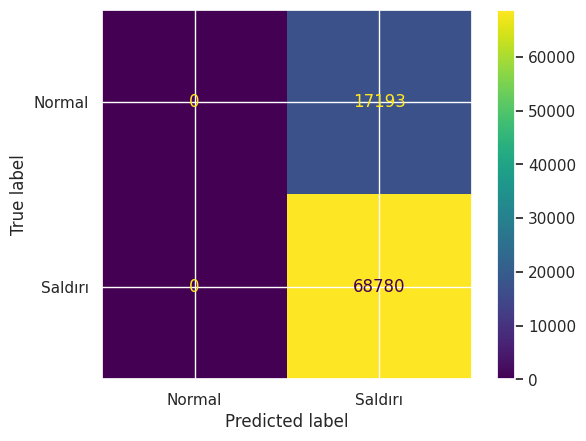

In [41]:
model=Sequential()
model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
model.add(SimpleRNN(40,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(24,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(4,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001), metrics=['acc'])
history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                  verbose=verbose,validation_split=validation_split)
print ("Model evaluate")
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
print ("Model evaluate")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("-----------------Classification Report -----------------------")
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))

cm = confusion_matrix(y_test, y_pred.round()) 
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=["Normal","Saldırı"])
cm_display.plot()
print("----------------------------------------")


# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

# ROC AUC
auc_rnn = round(roc_auc_score(y_test, yhat_probs),4)
print('ROC AUC: %f' % auc_rnn) 

fpr_rnn, tpr_rnn, thresholds = metrics.roc_curve(y_test, yhat_probs)
m_auc = metrics.roc_auc_score(y_test, yhat_probs)
print("----------------------------------------")

Epoch 1/5
454/454 [==============================] - 66s 135ms/step - loss: 0.6653 - acc: 0.8005 - val_loss: 0.5046 - val_acc: 0.8028
Epoch 2/5
454/454 [==============================] - 60s 133ms/step - loss: 0.5040 - acc: 0.8005 - val_loss: 0.4991 - val_acc: 0.8028
Epoch 3/5
454/454 [==============================] - 60s 132ms/step - loss: 0.5012 - acc: 0.8005 - val_loss: 0.4979 - val_acc: 0.8028
Epoch 4/5
454/454 [==============================] - 60s 133ms/step - loss: 0.5004 - acc: 0.8005 - val_loss: 0.4971 - val_acc: 0.8028
Epoch 5/5
454/454 [==============================] - 60s 133ms/step - loss: 0.5001 - acc: 0.8005 - val_loss: 0.4968 - val_acc: 0.8028
Model evaluate
Test loss: 0.5005578994750977
Test accuracy: 0.8000186085700989
Model evaluate


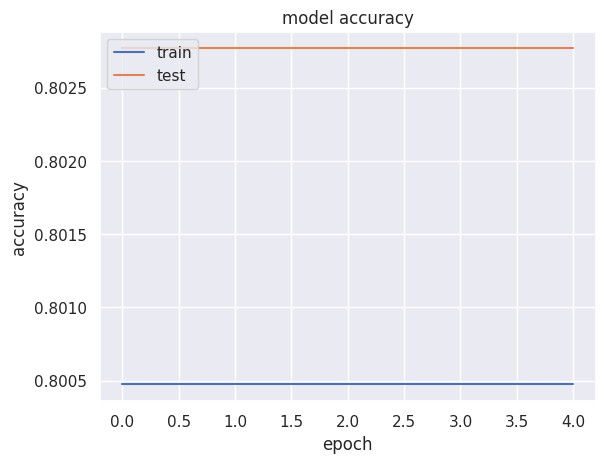

-----------------Classification Report -----------------------
2687/2687 [==============================] - 30s 11ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00     17193
        True       0.80      1.00      0.89     68780

    accuracy                           0.80     85973
   macro avg       0.40      0.50      0.44     85973
weighted avg       0.64      0.80      0.71     85973

----------------------------------------
ROC AUC: 0.500000
----------------------------------------


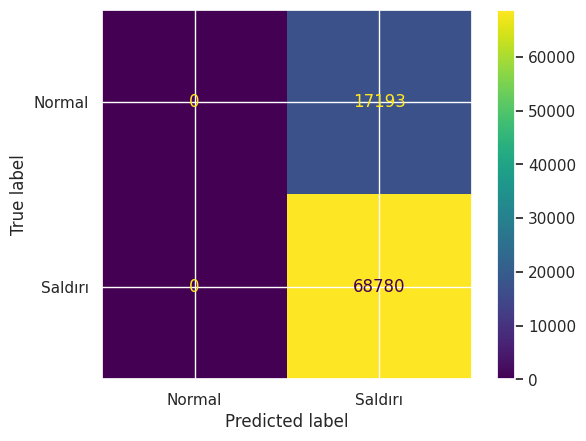

In [42]:
model=Sequential()
model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
model.add(LSTM(32,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16,activation='relu',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(4,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                  verbose=verbose,validation_split=validation_split)
print ("Model evaluate")
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
print ("Model evaluate")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("-----------------Classification Report -----------------------")
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))

cm = confusion_matrix(y_test, y_pred.round()) 
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=["Normal","Saldırı"])
cm_display.plot()
print("----------------------------------------")

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

# ROC AUC
auc_lstm = round(roc_auc_score(y_test, yhat_probs),4)
print('ROC AUC: %f' % auc_lstm) 

fpr_lstm, tpr_lstm, thresholds = metrics.roc_curve(y_test, yhat_probs)
m_auc = metrics.roc_auc_score(y_test, yhat_probs)
print("----------------------------------------")

Epoch 1/5
454/454 [==============================] - 5s 5ms/step - loss: 0.6256 - acc: 0.8005 - val_loss: 0.5080 - val_acc: 0.8028
Epoch 2/5
454/454 [==============================] - 2s 4ms/step - loss: 0.5031 - acc: 0.8005 - val_loss: 0.4988 - val_acc: 0.8028
Epoch 3/5
454/454 [==============================] - 2s 4ms/step - loss: 0.5008 - acc: 0.8005 - val_loss: 0.4988 - val_acc: 0.8028
Epoch 4/5
454/454 [==============================] - 2s 5ms/step - loss: 0.5002 - acc: 0.8005 - val_loss: 0.4970 - val_acc: 0.8028
Epoch 5/5
454/454 [==============================] - 2s 5ms/step - loss: 0.5000 - acc: 0.8005 - val_loss: 0.4971 - val_acc: 0.8028
Model evaluate
Test loss: 0.5007436275482178
Test accuracy: 0.8000186085700989
Model evaluate


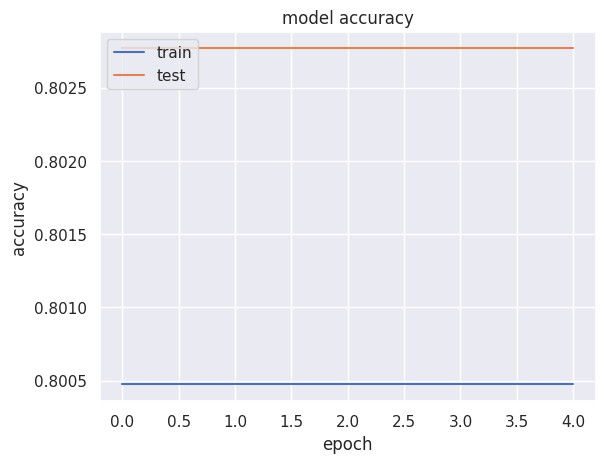

-----------------Classification Report -----------------------
2687/2687 [==============================] - 4s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00     17193
        True       0.80      1.00      0.89     68780

    accuracy                           0.80     85973
   macro avg       0.40      0.50      0.44     85973
weighted avg       0.64      0.80      0.71     85973

----------------------------------------
----------------------------------------


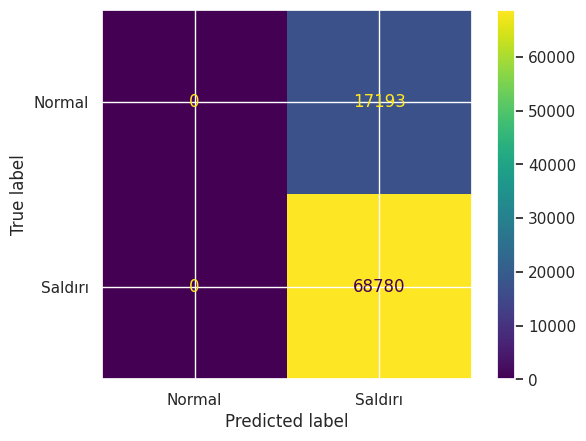

In [43]:
model=Sequential()
model.add(Embedding(vocab_size,max_len, trainable=True,input_length=max_len))
model.add(Conv1D(32,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Dropout(0.2))
model.add(Conv1D(16,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Dropout(0.2))
model.add(Conv1D(4,1,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(GlobalMaxPooling1D())
#model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['acc'])
history=model.fit(X_train, y_train, epochs=epoch_sayisi, batch_size=batch_size,
                  verbose=verbose,validation_split=validation_split)
print ("Model evaluate")
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
print ("Model evaluate")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


print("-----------------Classification Report -----------------------")
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred.round()))

cm = confusion_matrix(y_test, y_pred.round()) 
cm_display=ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=["Normal","Saldırı"])
cm_display.plot()
print("----------------------------------------")

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

# ROC AUC
auc_cnn = round(roc_auc_score(y_test, yhat_probs),4)
fpr_cnn, tpr_cnn, thresholds = metrics.roc_curve(y_test, yhat_probs)
m_auc = metrics.roc_auc_score(y_test, yhat_probs)
print("----------------------------------------")

Text(0.5, 0, 'False Positive')

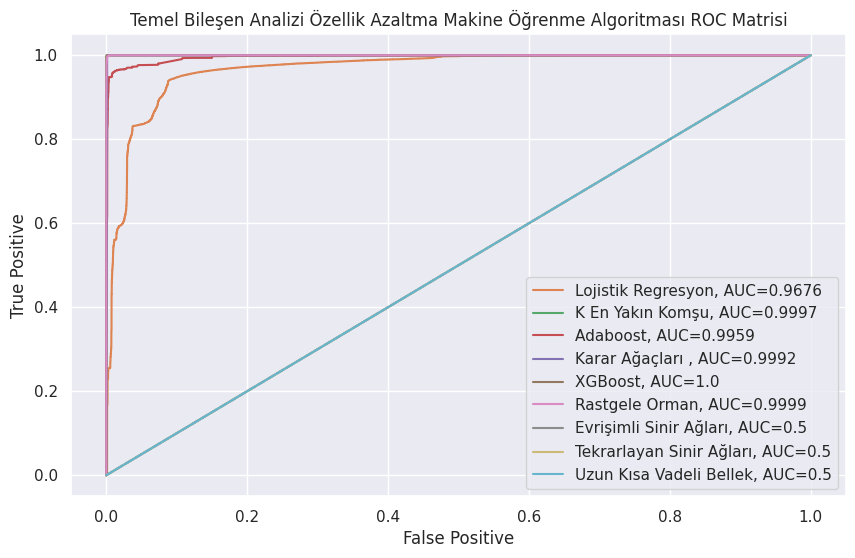

In [44]:
# ROC görselleştirme
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_lr,tpr_lr, label="Lojistik Regresyon, AUC="+str(auc_lr))
plt.plot(fpr_knn,tpr_knn, label="K En Yakın Komşu, AUC="+str(auc_knn))
plt.plot(fpr_adaboost,tpr_adaboost, label="Adaboost, AUC="+str(auc_adaboost))
plt.plot(fpr_dc,tpr_dc,label="Karar Ağaçları , AUC="+str(auc_dc))
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, AUC="+str(auc_xgb))
plt.plot(fpr_rf,tpr_rf,label="Rastgele Orman, AUC="+str(auc_rf))
plt.plot(fpr_cnn,tpr_cnn,label="Evrişimli Sinir Ağları, AUC="+str(auc_cnn))
plt.plot(fpr_rnn,tpr_rnn,label="Tekrarlayan Sinir Ağları, AUC="+str(auc_rnn))
plt.plot(fpr_lstm,tpr_lstm,label="Uzun Kısa Vadeli Bellek, AUC="+str(auc_lstm))
plt.title('Temel Bileşen Analizi Özellik Azaltma Makine Öğrenme Algoritması ROC Matrisi')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive')
plt.xlabel('False Positive')

In [45]:
print("Finish Time ", datetime.now())

Finish Time  2024-02-12 19:59:20.982537
